# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

## Generate initial data

In [70]:
np.random.seed(11111)
n = 300

X, y = make_classification(n_samples=n, n_features=2, n_redundant=0, random_state=11111)
y = y.reshape(-1,1)
data = pd.DataFrame(np.concatenate([X, y], axis=1), columns = ['X1','X2','target'])

X_bias = np.concatenate([X,np.ones([n, 1])],axis=1)

In [3]:
print(X.shape)
print(y.shape)

(300, 2)
(300, 1)


<Axes: xlabel='X1', ylabel='X2'>

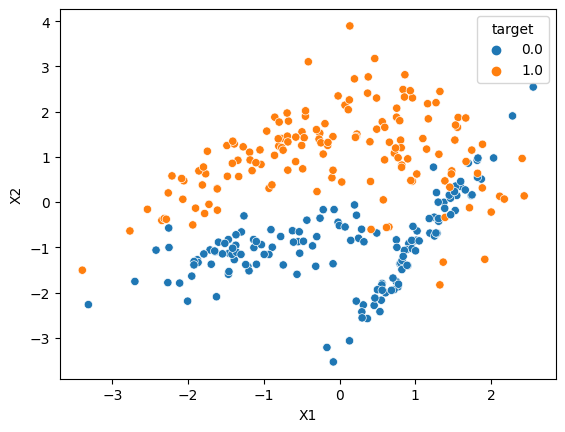

In [23]:
sns.scatterplot(data=data,x='X1',y='X2',hue='target')

# Define functions

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def compute_cost(theta, X, y):
  m = len(y)
  predictions = sigmoid(X.dot(theta))
  cost = np.sum(-(y*np.log(predictions) + (1 - y)*np.log(1 - predictions))) / m
  return cost

In [7]:
from numpy.linalg import norm

def gradient_descent(X, y, theta, learning_rate):
  m = len(y)
  cost_history = []
  iter = 0

  norma = 1
  t = 0.000001

  while norma >= t:
    pred = sigmoid(np.dot(X, theta))
    gradients = (1 / m) * np.dot(X.T, (pred - y))

    theta -= learning_rate * gradients
    cost_history.append(compute_cost(theta, X, y))

    norma = norm(gradients) # criterio de parada
    iter += 1

  return theta, cost_history, iter

In [52]:
def plots(X, y, theta, plot_cost_hist=True):
  x_range = range(-4,4)
  vals = []
  for x in x_range:
    vals.append( (-x*theta[0]-theta[2]) / theta[1])

  data = pd.DataFrame(np.concatenate([X, y], axis=1), columns = ['X1','X2','target'])
  sns.scatterplot(data=data,x='X1', y='X2', hue='target')
  plt.plot(x_range, vals, color='r')
  plt.show()

  if plot_cost_hist:
    plt.title('Cost history of the model')
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

  print(f"Optimal theta: {theta}")
  print(f"Final cost: {cost_history[-1]}")
  print(f"Number of iterations taken: {iterations}")

# Parte 2 - Critérios de Convergência

Usando numpy.linalg.norm

Optimal theta: [[-0.69152752]
 [ 2.5595635 ]
 [-0.0039347 ]]
Final cost: 0.29493578013759425
Number of iterations taken: 51


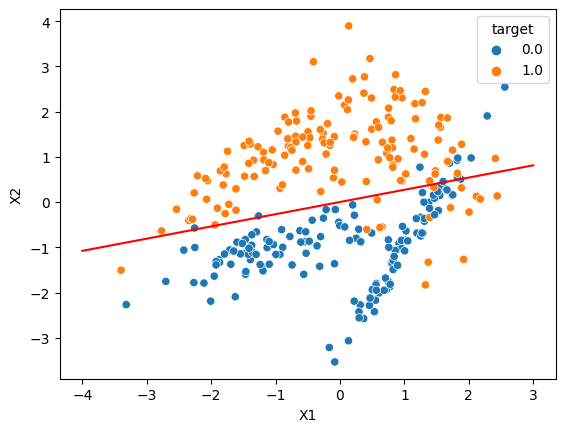

In [47]:
# Initial parameters (including the bias term)
initial_theta = np.random.rand(X_bias.shape[1], 1)

# Hyperparameters
learning_rate = 5

# Perform gradient descent to find the optimal parameters
theta, cost_history, iterations = gradient_descent(X_bias, y, initial_theta, learning_rate)

plots(X, y, theta, plot_cost_hist=False)

# Parte 3 - Taxa de Aprendizado
R: Conforme a taxa de aprendizado (dentre 0.01, 0.1 e 1) foi crescendo, o número de iterações necessário diminuía de maneira proporcional (fator de 10).

Optimal theta: [[-0.69152507]
 [ 2.55955645]
 [-0.0039357 ]]
Final cost: 0.29493578014408117
Number of iterations taken: 28351


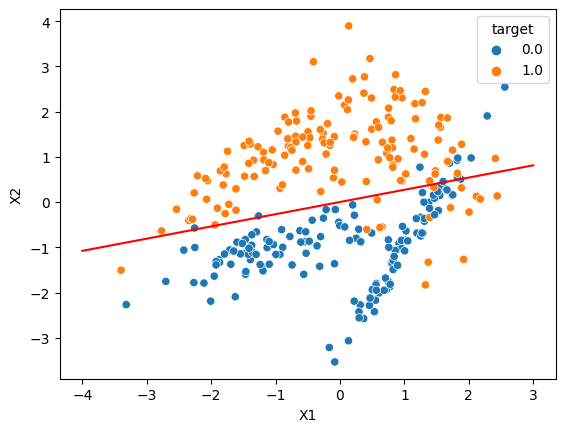

In [48]:
# Initial parameters (including the bias term)
initial_theta = np.random.rand(X_bias.shape[1], 1)

# Hyperparameters
learning_rate = 0.01

# Perform gradient descent to find the optimal parameters
theta, cost_history, iterations = gradient_descent(X_bias, y, initial_theta, learning_rate)

plots(X, y, theta, plot_cost_hist=False)

Optimal theta: [[-0.69152511]
 [ 2.55955655]
 [-0.00393568]]
Final cost: 0.29493578014397304
Number of iterations taken: 2845


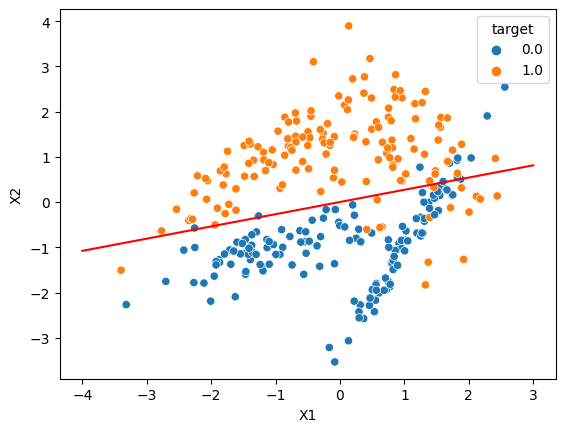

In [49]:
# Initial parameters (including the bias term)
initial_theta = np.random.rand(X_bias.shape[1], 1)

# Hyperparameters
learning_rate = 0.1

# Perform gradient descent to find the optimal parameters
theta, cost_history, iterations = gradient_descent(X_bias, y, initial_theta, learning_rate)

plots(X, y, theta, plot_cost_hist=False)

Optimal theta: [[-0.69152547]
 [ 2.5595576 ]
 [-0.00393553]]
Final cost: 0.29493578014287913
Number of iterations taken: 280


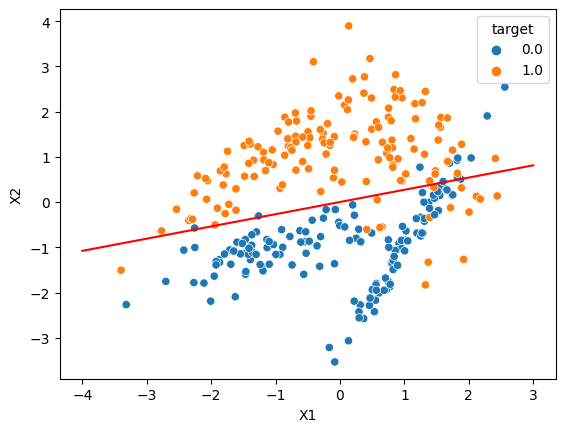

In [50]:
# Initial parameters (including the bias term)
initial_theta = np.random.rand(X_bias.shape[1], 1)

# Hyperparameters
learning_rate = 1

# Perform gradient descent to find the optimal parameters
theta, cost_history, iterations = gradient_descent(X_bias, y, initial_theta, learning_rate)

plots(X, y, theta, plot_cost_hist=False)

# Parte 4 - Acompanhando o Custo

Os gráficos têm formato semelhante, a principal diferença notada entre os gráficos foi o custo inicial e a quantidade de iterações para atingir o critério de parada.

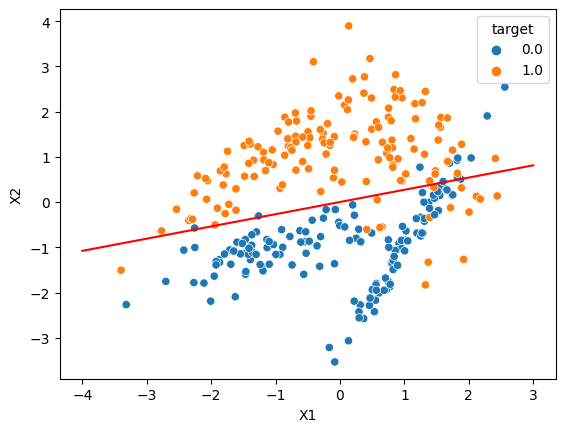

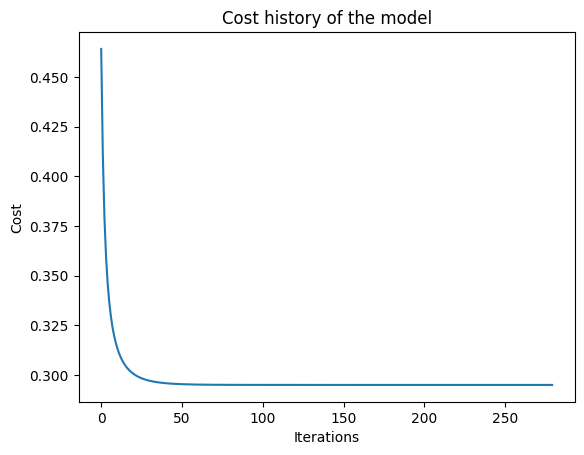

Optimal theta: [[-0.69152559]
 [ 2.55955795]
 [-0.00393548]]
Final cost: 0.2949357801425231
Number of iterations taken: 280


In [53]:
# Initial parameters (including the bias term)
initial_theta = np.random.rand(X_bias.shape[1], 1)

# Hyperparameters
learning_rate = 1

# Perform gradient descent to find the optimal parameters
theta, cost_history, iterations = gradient_descent(X_bias, y, initial_theta, learning_rate)

plots(X, y, theta, plot_cost_hist=True)

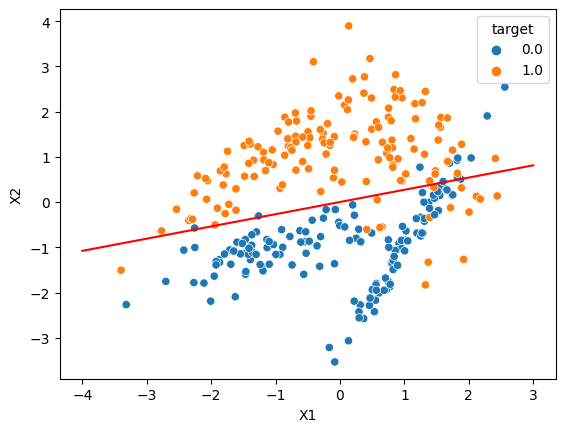

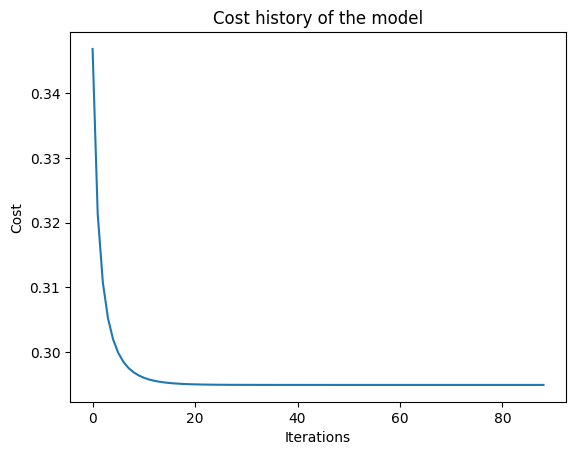

Optimal theta: [[-0.69152607]
 [ 2.55955933]
 [-0.00393529]]
Final cost: 0.29493578014118377
Number of iterations taken: 89


In [56]:
# Initial parameters (including the bias term)
initial_theta = np.random.rand(X_bias.shape[1], 1)

# Hyperparameters
learning_rate = 3

# Perform gradient descent to find the optimal parameters
theta, cost_history, iterations = gradient_descent(X_bias, y, initial_theta, learning_rate)

plots(X, y, theta, plot_cost_hist=True)

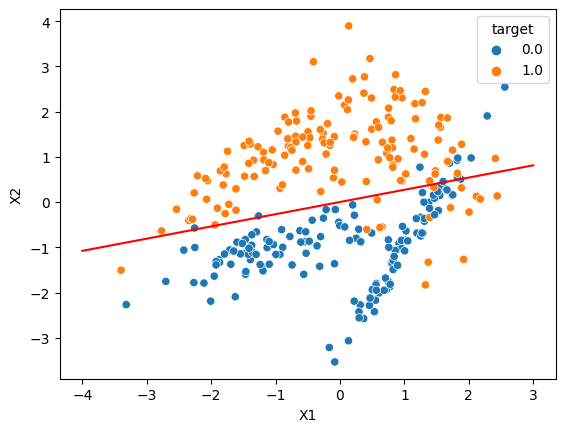

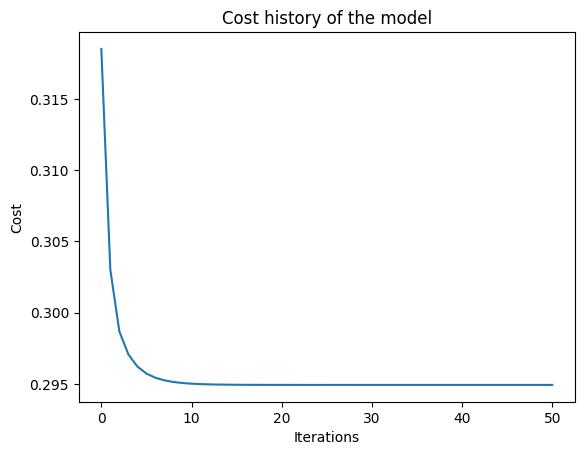

Optimal theta: [[-0.69152733]
 [ 2.55956295]
 [-0.00393477]]
Final cost: 0.294935780138022
Number of iterations taken: 51


In [54]:
# Initial parameters (including the bias term)
initial_theta = np.random.rand(X_bias.shape[1], 1)

# Hyperparameters
learning_rate = 5

# Perform gradient descent to find the optimal parameters
theta, cost_history, iterations = gradient_descent(X_bias, y, initial_theta, learning_rate)

plots(X, y, theta, plot_cost_hist=True)

# Parte 5 - Múltiplos Atributos

Já foi feita uma regressão múltipla

# Parte 6 - Regressão Polinomial

XX_bias está definido como uma matriz coluna de 1s, X (normal), X ao quadrado, e seno de X[2], o X bias agora tem mais dimensões logo também é necessário definir o theta com mais dimensões para fazer a multiplicação de vetores.

Vemos que o custo diminuiu, porém a diferença é risível, e levou bem mais iterações com o mesmo learning_rate. Adicionar mais features nesse caso parece não ter sido adequado.


In [73]:
# Generate synthetic data

XX_bias = np.c_[X_bias,
                X_bias**2,
                np.sin(X_bias[:,1]).reshape(-1,1)]

In [64]:
XX_bias.shape

(300, 7)

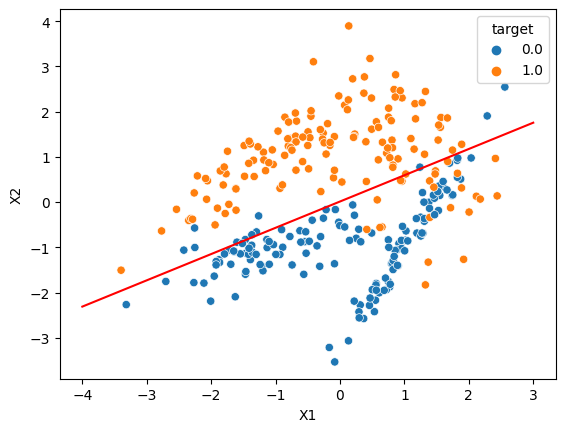

Optimal theta: [[-0.75331151]
 [ 1.2969151 ]
 [-0.01568965]
 [ 0.09495411]
 [-0.11226961]
 [-0.07420835]
 [ 1.98731988]]
Final cost: 0.28053169885262175
Number of iterations taken: 2158


In [74]:
# Initial parameters (including the bias term)
initial_theta = np.random.rand(XX_bias.shape[1], 1)

# Hyperparameters
learning_rate = 1

# Perform gradient descent to find the optimal parameters
theta, cost_history, iterations = gradient_descent(XX_bias, y, initial_theta, learning_rate)

plots(X, y, theta, plot_cost_hist=False)